In [ ]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np

from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense


# New section

In [3]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/train_labels.csv'
labels_df = pd.read_csv(file_path)


labels_df

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0
...,...,...
220020,53e9aa9d46e720bf3c6a7528d1fca3ba6e2e49f6,0
220021,d4b854fe38b07fe2831ad73892b3cec877689576,1
220022,3d046cead1a2a5cbe00b2b4847cfb7ba7cf5fe75,0
220023,f129691c13433f66e1e0671ff1fe80944816f5a2,0


In [ ]:
!unzip /content/drive/MyDrive/train_subset

In [8]:
import os
import random
from sklearn.utils import shuffle

image_folder_label0 = '/content/train_subset/a_no_tumor_tissue/'
image_folder_label1 = '/content/train_subset/b_has_tumor_tissue/'

images_label0 = [f for f in os.listdir(image_folder_label0) if f.endswith('.tif')]
images_label1 = [f for f in os.listdir(image_folder_label1) if f.endswith('.tif')]

images = images_label0 + images_label1
labels = [0] * len(images_label0) + [1] * len(images_label1)

images, labels = shuffle(images, labels, random_state=42)

In [32]:
from PIL import Image
import numpy as np
import cv2

def read_and_process_image(file_path):
    img = Image.open(file_path)
    img = img.resize((224, 224))
    return img

images = [os.path.join(image_folder_label0, img) if label == 0 else os.path.join(image_folder_label1, img) for img, label in zip(images, labels)]

# image_arrays = [read_and_process_image(img) for img in images]
image_arrays = [cv2.imread(img_path) for img_path in images]

valid_data = [(img, label, img_array) for img, label, img_array in zip(images, labels, image_arrays) if img_array is not None]
df = pd.DataFrame(valid_data, columns=['image_path', 'label', 'image_array'])

In [33]:
df.head()

,image_path,label,image_array
0,/content/train_subset/a_no_tumor_tissue/1feb7e...,0,"[[[199, 180, 205], [134, 117, 138], [211, 198,..."
1,/content/train_subset/a_no_tumor_tissue/7e95eb...,0,"[[[175, 181, 188], [242, 239, 255], [192, 175,..."
2,/content/train_subset/b_has_tumor_tissue/f6e91...,1,"[[[144, 108, 190], [131, 95, 177], [133, 99, 1..."
3,/content/train_subset/a_no_tumor_tissue/14bc8d...,0,"[[[40, 18, 66], [33, 7, 55], [56, 20, 72], [14..."
4,/content/train_subset/a_no_tumor_tissue/12c550...,0,"[[[233, 227, 232], [233, 227, 232], [233, 227,..."


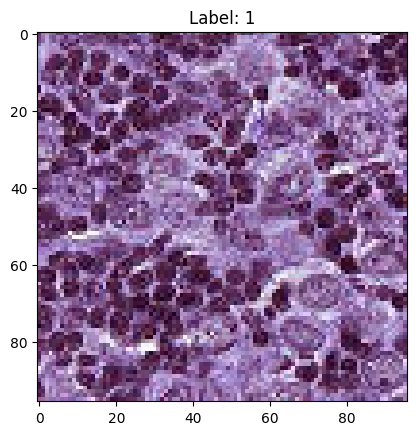

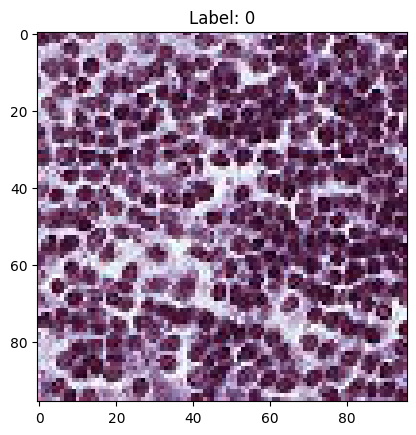

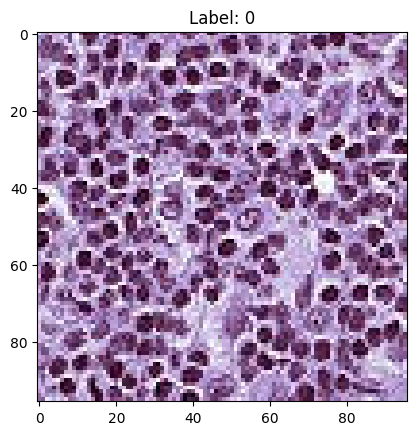

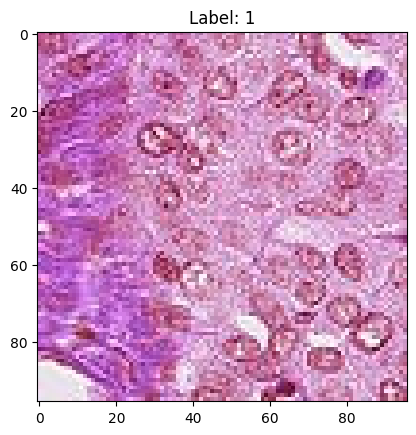

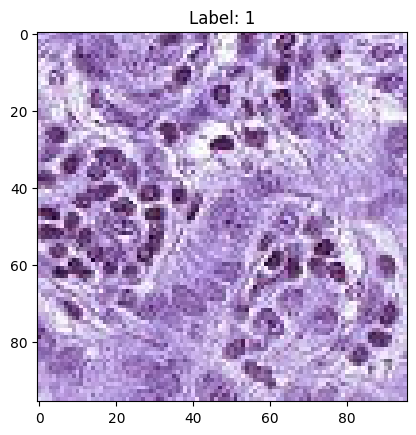

In [36]:
import matplotlib.pyplot as plt

sample_images = df.sample(5)
for index, row in sample_images.iterrows():
    plt.imshow(row['image_array'])
    plt.title(f"Label: {row['label']}")
    plt.show()

In [37]:
X = np.stack(df['image_array'].values)
y = df['label'].values

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)


In [39]:
X_train.shape

(5400, 96, 96, 3)

In [6]:
# import cv2
# import os
# import random

# images = []

# image_folder_path_no_tumor = '/content/train_subset/a_no_tumor_tissue/'
# for img_name in labels_df['id']:
#   img_path = os.path.join(image_folder_path_no_tumor, img_name)
#   img = cv2.imread(img_path + '.tif')
#   if img is not None:
#     images.append(img)


# image_folder_path_has_tumor = '/content/train_subset/b_has_tumor_tissue/'
# for img_name in labels_df['id']:
#   img_path = os.path.join(image_folder_path_has_tumor, img_name)
#   img = cv2.imread(img_path + '.tif')
#   if img is not None:
#     images.append(img)

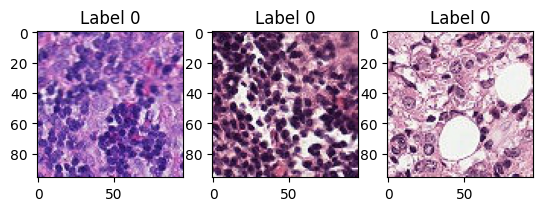

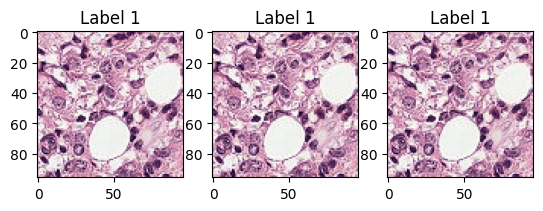

In [ ]:
# import matplotlib.pyplot as plt

# label_0 = labels_df[labels_df['label'] == 0].index
# plt.figure()
# for i, idx in enumerate(label_0[:3]):
#   plt.subplot(2, 3, i+1)
#   plt.imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))
#   plt.title("Label 0")

# label_1 = labels_df[labels_df['label'] == 1].index
# plt.figure()
# for i, id in enumerate(label_1[:3]):
#   plt.subplot(2, 3, i+1)
#   plt.imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))
#   plt.title("Label 1")